In [15]:
import requests
import pandas as pd
import json
import datetime as dt
import matplotlib.pyplot as plt

In [16]:
#requesting data for the price of rice in EU member states
riceprice=requests.get("https://www.ec.europa.eu/agrifood/api/rice/prices?")

In [17]:
df_riceprice_rawdata=pd.DataFrame(riceprice.json())
display(df_riceprice_rawdata.head(5))


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
0,EL,Greece,16/01/2006,22/01/2006,21,€175.00,Tonne,2005/2006,Paddy,Indica,Average
1,EL,Greece,12/12/2005,18/12/2005,16,€170.00,Tonne,2005/2006,Paddy,Indica,Average
2,EL,Greece,05/12/2005,11/12/2005,15,€170.00,Tonne,2005/2006,Paddy,Indica,Average
3,EL,Greece,10/10/2005,16/10/2005,7,€160.00,Tonne,2005/2006,Paddy,Indica,Average
4,EL,Greece,19/09/2005,25/09/2005,4,€165.00,Tonne,2005/2006,Paddy,Indica,Average


In [18]:
#European Commission Data on Rice Price for 8 Members of EU
#Raw Data cleaning

df_riceprice=df_riceprice_rawdata.copy()
df_riceprice["price"]=df_riceprice["price"].str.replace("€","") # removing the € character in price column
df_riceprice["price"]=pd.to_numeric(df_riceprice["price"])   # changing price data into numeric data type
display(df_riceprice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   memberStateCode  19176 non-null  object 
 1   memberStateName  19176 non-null  object 
 2   beginDate        19176 non-null  object 
 3   endDate          19176 non-null  object 
 4   weekNumber       19176 non-null  int64  
 5   price            19176 non-null  float64
 6   unit             19176 non-null  object 
 7   marketingYear    19176 non-null  object 
 8   stage            19176 non-null  object 
 9   type             19176 non-null  object 
 10  variety          19176 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


None

In [19]:
# Data filtering 
# Filtering by Year from RAW data
series_byyear=df_riceprice_rawdata.beginDate.str.extract(r"[/](\d{4})") #Series data for each year
#print(type(df_data_byyear))
df_ricebyyear=pd.concat([df_riceprice, series_byyear], axis=1)
df_ricebyyear.rename(columns={0:"Year"}, inplace=True) #Renaming column as Year
df_ricebyyear.set_index("Year", inplace=True) #Sorting index by year
df_ricebyyear.sort_index(inplace=True)
display(df_ricebyyear.sort_values("memberStateName"))
#display(df_ricebyyear.index)

,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
Year,,,,,,,,,,,
2013,BG,Bulgaria,10/06/2013,16/06/2013,41,416.20,Tonne,2012/2013,Milled,Japonica,Average
2014,BG,Bulgaria,31/03/2014,06/04/2014,31,148.28,Tonne,2013/2014,Broken,Japonica,Average
2011,BG,Bulgaria,11/07/2011,17/07/2011,46,156.97,Tonne,2010/2011,Paddy,Japonica,Average
2018,BG,Bulgaria,22/01/2018,28/01/2018,21,268.43,Tonne,2017/2018,Paddy,Japonica,Average
2018,BG,Bulgaria,02/07/2018,08/07/2018,44,268.43,Tonne,2017/2018,Paddy,Japonica,Average
...,...,...,...,...,...,...,...,...,...,...,...
2016,ES,Spain,07/03/2016,13/03/2016,28,583.66,Tonne,2015/2016,Milled non parboiled,Japonica,Not informed
2010,ES,Spain,18/10/2010,24/10/2010,8,268.00,Tonne,2010/2011,Paddy,Japonica,Average
2018,ES,Spain,29/01/2018,04/02/2018,22,512.79,Tonne,2017/2018,Milled non parboiled,Indica,Average


In [20]:
#Filtering data for rice price in each country 
print(df_ricebyyear.memberStateName.unique())
df_Italy=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Italy'")
Italy=df_Italy.groupby(["Year"]).mean().rename(columns={"price":"Italy"})
df_Greece=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Greece'")
Greece=df_Greece.groupby(["Year"]).mean().rename(columns={"price":"Greece"})
df_Spain=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Spain'")
Spain=df_Spain.groupby(["Year"]).mean().rename(columns={"price":"Spain"})
df_Portugal=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Portugal'")
Portugal=df_Portugal.groupby(["Year"]).mean().rename(columns={"price":"Portugal"})
df_Bulgaria=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Bulgaria'")
Bulgaria=df_Bulgaria.groupby(["Year"]).mean().rename(columns={"price":"Bulgaria"})
df_France=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='France'")
France=df_France.groupby(["Year"]).mean().rename(columns={"price":"France"})
df_Germany=df_ricebyyear[["memberStateName", "price"]].query("memberStateName=='Germany'")
Germany=df_Germany.groupby(["Year"]).mean().rename(columns={"price":"Germany"})
df_Romania=df_ricebyyear.groupby(["Year"]).mean().rename(columns={"price":"Romania"})
Romania=df_Romania.groupby(["Year"]).mean().rename(columns={"price":"Romania"})
display(Romania.head())

['Italy' 'Greece' 'Portugal' 'Spain' 'Romania' 'Bulgaria' 'France'
 'Germany']


,weekNumber,Romania
Year,,
2000,10.869565,362.473478
2001,25.996779,386.423977
2002,25.157787,393.219611
2003,26.064762,381.000381
2004,26.438976,342.879409


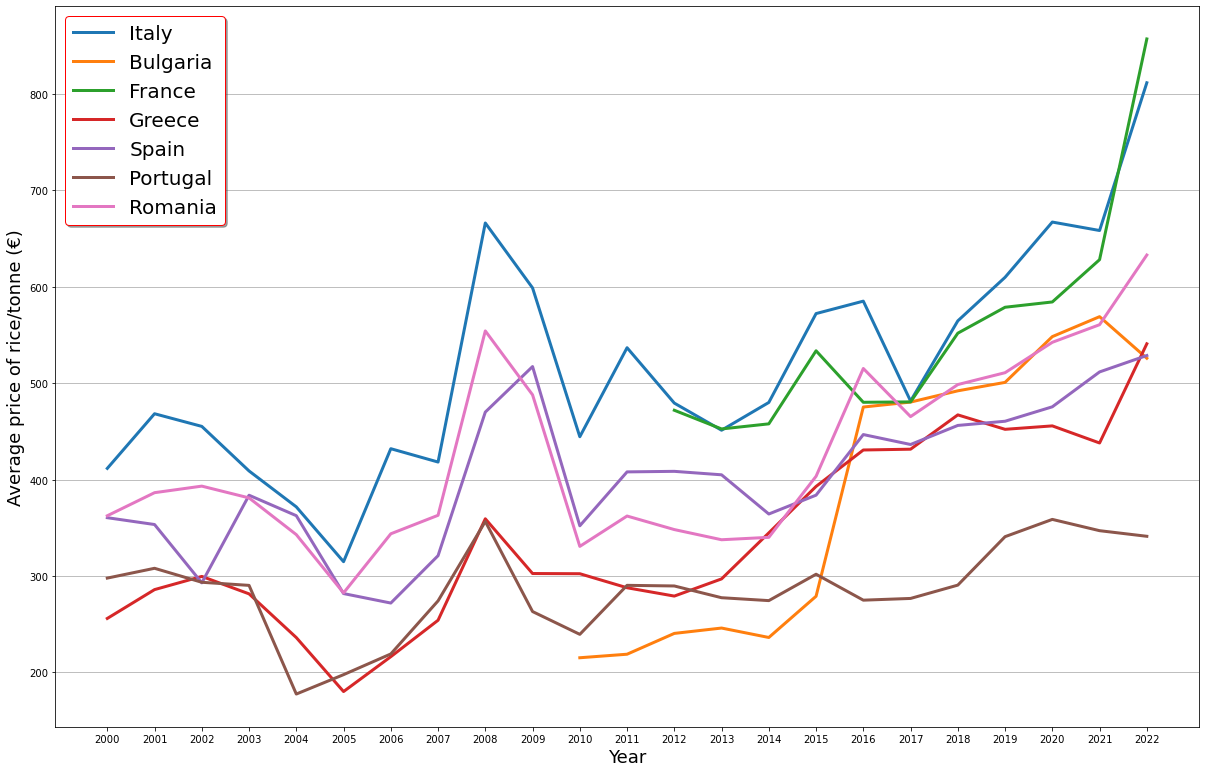

In [21]:
fig, ax = plt.subplots(figsize=(17, 11))
ax.plot(Italy.index, Italy["Italy"], label="Italy", linewidth=3)

ax.plot(Bulgaria.index, Bulgaria["Bulgaria"], label="Bulgaria", linewidth=3)

ax.plot(France.index, France["France"], label="France", linewidth=3)

ax.plot(Greece.index, Greece["Greece"], label="Greece", linewidth=3)

ax.plot(Spain.index, Spain["Spain"], label="Spain", linewidth=3)

ax.plot(Portugal.index, Portugal["Portugal"], label="Portugal", linewidth=3)

ax.plot(Romania.index, Romania["Romania"], label="Romania", linewidth=3)

#ax.plot(Germany.index, Germany["Germany"], label="Germany", linewidth=3)
#ax.plot(year, Bulgaria, label="Bulgaria")
ax.legend(fontsize=20,edgecolor="red", shadow=True)
plt.rcParams.update({'font.size': 15})
plt.xlabel("Year", fontsize=18)
ax.grid(axis="y")
plt.ylabel("Average price of rice/tonne (€)", fontsize=18)
plt.tight_layout()
plt.show()
fig.savefig("Figures/trendlineofprice.jpeg", dpi=1000)